> Created on Tue Sep 12 15:58:43 2017  @author: Richie Bao-caDesign设计(cadesign.cn)
> __+updated on Tue Jun 16 14:26:28 2020 by Richie Bao

# 单个分类POI数据爬取与地理空间点地图
在城市空间分析中，必然会涉及到两个方面的数据，一类是实体的物质空间（强调几何意义），其亦可以划分为二维平面数据（例如遥感影像，城市地图等）和三维空间数据（例如雷达数据（高空扫描和地面扫描），一般意义上各类格式的城市三维模型等）；以及由物质空间承载的各类属性数据，一类反映二维平面数据的属性（与二维地理位置结合，可以划分到二维平面数据当中），例如用地类型、自然资源分布、地址名称等；和反映人类、动物及无形物质各类活动性质的数据，例如人们的活动轨迹（出租车和共享单车车行轨迹、夜间灯光、手机基站定位用户数量等）、动物迁徙路径和各类小气候测量指标变化等。

[百度地图开放平台](http://lbsyun.baidu.com/index.php?title=%E9%A6%96%E9%A1%B5)提供地图相关的功能与服务，其Web服务API为开发者提供http/https接口，即开发者通过http/https形式发起检索请求，获取返回json或xml格式的检索数据。其中[兴趣点(POI,points of interest)](http://lbsyun.baidu.com/index.php?title=lbscloud/poitags)数据,目前包括21个大类，和无数小类，是反映物质空间承载的人类活动属性的数据（业态分布），如下：


| 一级行业分类 | 二级行业分类                                                                                                                                                                         |
|--------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 美食         |  中餐厅、外国餐厅、小吃快餐店、蛋糕甜品店、咖啡厅、茶座、酒吧、其他                                                                                                                  |
|  酒店        |  星级酒店、快捷酒店、公寓式酒店、民宿、其他                                                                                                                                          |
|  购物        |  购物中心、百货商场、超市、便利店、家居建材、家电数码、商铺、市场、其他                                                                                                              |
|  生活服务    |  通讯营业厅、邮局、物流公司、售票处、洗衣店、图文快印店、照相馆、房产中介机构、公用事业、维修点、家政服务、殡葬服务、彩票销售点、宠物服务、报刊亭、公共厕所、步骑行专用道驿站、其他  |
|  丽人        |  美容、美发、美甲、美体、其他                                                                                                                                                        |
|  旅游景点    |  公园、动物园、植物园、游乐园、博物馆、水族馆、海滨浴场、文物古迹、教堂、风景区、景点、寺庙、其他                                                                                    |
|  休闲娱乐    |  度假村、农家院、电影院、ktv、剧院、歌舞厅、网吧、游戏场所、洗浴按摩、休闲广场、其他                                                                                                 |
|  运动健身    |  体育场馆、极限运动场所、健身中心、其他                                                                                                                                              |
|  教育培训    |  高等院校、中学、小学、幼儿园、成人教育、亲子教育、特殊教育学校、留学中介机构、科研机构、培训机构、图书馆、科技馆、 其他                                                             |
|  文化传媒    |  新闻出版、广播电视、艺术团体、美术馆、展览馆、文化宫、其他                                                                                                                          |
|  医疗        |  综合医院、专科医院、诊所、药店、体检机构、疗养院、急救中心、疾控中心、医疗器械、医疗保健、其他                                                                                      |
|  汽车服务    |  汽车销售、汽车维修、汽车美容、汽车配件、汽车租赁、汽车检测场、其他                                                                                                                  |
|  交通设施    |  飞机场、火车站、地铁站、地铁线路、长途汽车站、公交车站、公交线路、港口、停车场、加油加气站、服务区、收费站、桥、充电站、路侧停车位、普通停车位、接送点、其他                        |
|  金融        |  银行、ATM、信用社、投资理财、典当行、其他                                                                                                                                           |
|  房地产      |  写字楼、住宅区、宿舍、内部楼栋、其他                                                                                                                                                |
|  公司企业    |  公司、园区、农林园艺、厂矿、其他                                                                                                                                                    |
|  政府机构    |  中央机构、各级政府、行政单位、公检法机构、涉外机构、党派团体、福利机构、政治教育机构、社会团体、民主党派、居民委员会、其他                                                          |
|  出入口      |  高速公路出口、高速公路入口、机场出口、机场入口、车站出口、车站入口、门（备注：建筑物和建筑物群的门）、停车场出入口、自行车高速出口、自行车高速入口、自行车高速出入口、其他          |
|  自然地物    |  岛屿、山峰、水系、其他                                                                                                                                                              |
|  行政地标    |  省、省级城市、地级市、区县、商圈、乡镇、村庄、其他                                                                                                                                  |
|  门址        |  门址点、其他  

> 引自：[百度地图开放平台](http://lbsyun.baidu.com/index.php?title=lbscloud/poitags) 更新于2020年5月11日。

## 1. 百度地图POI数据的抓取-单个分类实现与地理空间点地图
### 1.1 单个分类POI爬取
要爬取数据，需要查看百度提供的检索方法，根据其要求来配置对应参数实现下载，具体查看其[服务文档](http://lbsyun.baidu.com/index.php?title=webapi/guide/webservice-placeapi)。本次实验对应配置检索语句为，矩形区域检索:`http://api.map.baidu.com/place/v2/search?query=银行&bounds=39.915,116.404,39.975,116.414&output=json&ak={您的密钥} //GET请求`，百度地图例举的语句仅包含个别请求参数，实际上提供的行政区划区域检索请求参数约15个左右，可以根据自己对数据的下载需求来确定使用哪些请求参数。同时，亦提供了圆形区域检索、矩形区域检索、地点详情检索服务等服务。此次行政区域检索的请求参数配置上如下：
```python
query_dic={
   'query':检索关键字。圆形区域检索和矩形区域内检索支持多个关键字并集检索，不同关键字间以\$符号分隔，最多支持10个关键字检索。如:”银行$酒店”
如果需要按POI分类进行检索，将分类通过query参数进行设置，例如query='旅游景点',
   'page_size': 单次召回POI数量，默认为10条记录，最大返回20条。多关键字检索时，返回的记录数为关键字个数*page_size，例如page_size='20', 
   'page_num':分页页码，默认为0,0代表第一页，1代表第二页，以此类推。常与page_size搭配使用，例如page_num='0',
   'scope':检索结果详细程度。取值为1 或空，则返回基本信息；取值为2，返回检索POI详细信息，例如 scope='2',
   'bounds':检索矩形区域，为左下角和右上角坐标，多组坐标间以","分隔 ,例如str(leftBottomCoordi[1]) + ',' + str(leftBottomCoordi[0]) + ','+str(rightTopCoordi[1]) + ',' + str(rightTopCoordi[0]),
   'output':输出格式为json或者xml ，例如output='json',
   'ak':开发者的访问密钥，必填项。v2之前该属性为key,                   
}
```
如需下载数据，请求参数是需要申请访问密码'ak'，[申请地址](http://lbsyun.baidu.com/apiconsole/key/create)。注意，需要注册登录。
首先来配置基本的参数，最终要实现的目的是将下载后的数据分别存储为.csv（Comma-Separated Values，逗号（字符）分隔值，以纯文本形式存储表格数据）和.json（JavaScript Object Notation，轻量级数据交换格式，层次结构简洁清晰）数据格式,因此调入json和csv库，辅助读写对应格式的文件。因为要通过网页地址来检索数据，因此调入urllib的HTTP库实现相应的URL（Uniform Resource Locator,统一资源定位符，即网络地址）处理。对文件路径的管理则可以使用os以及pathlib库。

In [13]:
import urllib, json, csv,os,pathlib
data_path='./data' #配置数据存储位置
#定义存储文件名
poi_fn_csv=os.path.join(data_path,'poi_csv.csv')
poi_fn_json=os.path.join(data_path,'poi_json.json')

配置请求参数，注意其中page_num参数为页数递增，初始参数时，配置页数范围`page_num_range=range(20)`。而output参数直接配置为固定的'json'，因此直接在函数内部实现。同时，由于百度API的限制，检索区域内最多返回的POI数据量有限制，造成下载疏漏，因此如果下载区域很大时，最好是将其切分为数个矩形逐一下载，从而增加一个配置参数`partition`实现检索区域的切分次数，如果设置为2，则切分矩形为4份检索区域分别下载。

注意在配置坐标时，使用[百度地图坐标拾取系统](http://api.map.baidu.com/lbsapi/getpoint/index.html)

In [14]:
bound_coordinate={'leftBottom':[108.776852,34.186027],'rightTop':[109.129275,34.382171]} #
page_num_range=range(20)
partition=4 #4
query_dic={
    'query':'旅游景点',
    'page_size':'20', #20
    'scope':2,
    'ak':'uqRcWhrQ6h0pAaSdxYn73GMWgd5uNrRX',
}

通过定义一个函数实现百度地图开放平台下，基于矩形区域检索爬取POI数据，方便日后相关项目的代码迁移或者调用，增加代码融合的力度。因此，需要谨慎确定输入参数，避免在调用时还需调整函数内的变量，造成不必要的错误。由百度地图下载数据，其经纬度坐标为百度坐标系，因此需要对其进行转换，调入转换代码文件`coordinate_transformation.py`(该转换文件来自于网络)。

在坐标转换过程中，调用了两个转换函数，函数`bd09togcj02(bd_lon, bd_lat)`和`gcj02towgs84(lng, lat)`，因此，可以直接迁移，但是，因为这两个函数还有依赖函数，因此直接调用源文件能够让代码结构更清晰。关于坐标转换文件可以自行从GitHub托管仓库查看。当运行爬取函数时，需要将坐标转换文件放置于与该.ipynb文件于同一文件夹下，用以调用。

In [17]:
import coordinate_transformation as cc
def baiduPOI_dataCrawler(query_dic,bound_coordinate,partition,page_num_range,poi_fn_list=False):
    '''function-百度地图开放平台POI数据爬取'''
    urlRoot='http://api.map.baidu.com/place/v2/search?' #数据下载网址，查询百度地图服务文档
    #切分检索区域
    xDis=(bound_coordinate['rightTop'][0]-bound_coordinate['leftBottom'][0])/partition
    yDis=(bound_coordinate['rightTop'][1]-bound_coordinate['leftBottom'][1])/partition    
    #判断是否要写入文件
    if poi_fn_list:
        for file_path in poi_fn_list:
            fP=pathlib.Path(file_path)
            if fP.suffix=='.csv':
                poi_csv=open(fP,'w',encoding='utf-8')
                csv_writer=csv.writer(poi_csv)    
            elif fP.suffix=='.json':
                poi_json=open(fP,'w',encoding='utf-8')
    num=0
    jsonDS=[] #存储读取的数据，用于.json格式数据的保存
    #循环切分的检索区域，逐区下载数据
    print("Start downloading data...")
    for i in range(partition):
        for j in range(partition):
            leftBottomCoordi=[bound_coordinate['leftBottom'][0]+i*xDis,bound_coordinate['leftBottom'][1]+j*yDis]
            rightTopCoordi=[bound_coordinate['leftBottom'][0]+(i+1)*xDis,bound_coordinate['leftBottom'][1]+(j+1)*yDis]
            for p in page_num_range:  
                #更新请求参数
                query_dic.update({'page_num':str(p),
                                  'bounds':str(leftBottomCoordi[1]) + ',' + str(leftBottomCoordi[0]) + ','+str(rightTopCoordi[1]) + ',' + str(rightTopCoordi[0]),
                                  'output':'json',
                                 })
                
                url=urlRoot+urllib.parse.urlencode(query_dic)
                data=urllib.request.urlopen(url)
                responseOfLoad=json.loads(data.read()) 
                if responseOfLoad.get("message")=='ok':
                    results=responseOfLoad.get("results") 
                    for row in range(len(results)):
                        subData=results[row]
                        baidu_coordinateSystem=[subData.get('location').get('lng'),subData.get('location').get('lat')] #获取百度坐标系
                        Mars_coordinateSystem=cc.bd09togcj02(baidu_coordinateSystem[0], baidu_coordinateSystem[1]) #百度坐标系-->火星坐标系
                        WGS84_coordinateSystem=cc.gcj02towgs84(Mars_coordinateSystem[0],Mars_coordinateSystem[1]) #火星坐标系-->WGS84
                        
                        #更新坐标
                        subData['location']['lat']=WGS84_coordinateSystem[1]
                        subData['detail_info']['lat']=WGS84_coordinateSystem[1]
                        subData['location']['lng']=WGS84_coordinateSystem[0]
                        subData['detail_info']['lng']=WGS84_coordinateSystem[0]                        
                        if csv_writer:
                            csv_writer.writerow([subData]) #逐行写入.csv文件
                        jsonDS.append(subData)
            num+=1       
            print("No."+str(num)+" was written to the .csv file.")
    if poi_json:       
        json.dump(jsonDS,poi_json)
        poi_json.write('\n')
        poi_json.close()
    if poi_csv:
        poi_csv.close()
    print("The download is complete.")
    return jsonDS
jsonDS=baiduPOI_dataCrawler(query_dic,bound_coordinate,partition,page_num_range,poi_fn_list=[poi_fn_csv,poi_fn_json])    

Start downloading data...
No.1 was written to the .csv file.
No.2 was written to the .csv file.
No.3 was written to the .csv file.
No.4 was written to the .csv file.
No.5 was written to the .csv file.
No.6 was written to the .csv file.
No.7 was written to the .csv file.
No.8 was written to the .csv file.
No.9 was written to the .csv file.
No.10 was written to the .csv file.
No.11 was written to the .csv file.
No.12 was written to the .csv file.
No.13 was written to the .csv file.
No.14 was written to the .csv file.
No.15 was written to the .csv file.
No.16 was written to the .csv file.
The download is complete.


### 1.2 将.csv格式的POI数据转换为pandas的DataFrame
读取已经保存的poi_csv.csv文件，因为在文件保存时，使用的是csv和json库，因此读取时仍旧使用对应的库。在最为常用使用的pandas库中也有'read_csv()'和`read_json()`等方法，但是csv文件具体存储时，保存的方式也是多样的，因此pandas读取.csv或者.json文件最好是其自身所存储的文件，数据格式则是对应的，而读取上述保存的POI的.csv文件，则会出现错误。只有知道数据格式，才能够有目的的提取数据，读取每一行的数据格式如下：
```python
["{'name': '昆明池遗址', 'location': {'lat': 34.210991, 'lng': 108.779778}, 'address': '西安市长安区昆明池七夕公园内', 'province': '陕西省', 'city': '西安市', 'area': '长安区', 'detail': 1, 'uid': 'c7332cd7fbcc0d82ebe582d9', 'detail_info': {'tag': '旅游景点;景点', 'navi_location': {'lng': 108.7812626866, 'lat': 34.217484892966}, 'type': 'scope', 'detail_url': 'http://api.map.baidu.com/place/detail?uid=c7332cd7fbcc0d82ebe582d9&amp;output=html&amp;source=placeapi_v2', 'overall_rating': '4.3', 'comment_num': '77', 'children': []}}"]
```
读取.csv数据之后，直接使用.csv的格式数据来提取和分析数据并不是很方便。最为常用的数据格式是numpy库提供的数组（array）和pandas提供的DataFrame及series。其中numpy的数据组织形式更倾向于科学计算，为数阵形式，每一数组为同一数据类型；而pandas的DataFrame与地理信息数据中的属性表类似，其列（column）可以理解为属性字段(field)，每一列的数据类型相同，因此一个DataFrame可以包括多种数据类型，因此就POI的.csv数据而言，将其转换为DataFrame的数据格式是最好的。进一步而言，在城市空间数据分析方法中，更多的数据是基于地理空间位置的，因此对于具有地理属性的数据而言，需要以地理信息系统的思想来处理，在处理为DataFrame数据格式之后，则进一步应用GeoPandas等地理信息库来处理地理空间信息数据。

原始数据可能存在错误的数据格式，在数据格式转换时往往会出现错误，例如下述不正确的数据：
```python
["{'name': '励进海升酒店-多功能厅', 'location': {'lat': 34.218525, 'lng': 108.891524}, 'address': '西安市高新区沣惠南路34号励进海升酒店4层', 'province': '陕西省', 'city': '西安市', 'a{'name': '红蚂蚁少儿创意美术馆'", " 'location': {'lat': 34.306666", " 'lng': 108.822465}", " 'address': '陕西省西安市未央区后围寨启航佳苑B区3层商铺'", " 'province': '陕西省'", " 'city': '西安市'", " 'area': '未央区'", " 'telephone': '18209227178", "15229372642'", " 'detail': 1", " 'uid': 'e3fd730bb528b40015c9050c'", " 'detail_info': {'tag': '文化传媒;美术馆'", " 'type': 'scope'", " 'detail_url': 'http://api.map.baidu.com/place/detail?uid=e3fd730bb528b40015c9050c&amp;output=html&amp;source=placeapi_v2'", " 'overall_rating': '0.0'", ' \'children\': []}}"']
```
其中`'a{'name': '红蚂蚁少儿创意美术馆'",`为多余的部分，并不符合任何语法，因此在数据处理时，需要对此做出反应。通常使用`try/except`语句处理，最好返回可以索引的信息，并加以处理，避免数据损失。

In [18]:
import pandas as pd
from benedict import benedict #benedict库是dict的子类，支持键列表（keylist）/键路径（keypath），应用该库的flatten方法展平嵌套的字典，准备用于DataFrame数据结构
def csv2df(poi_fn_csv):
    '''function-转换.csv格式的POI数据为pandas的DataFrame'''
    n=0
    with open(poi_fn_csv, newline='',encoding='utf-8') as csvfile:
        poi_reader=csv.reader(csvfile)
        poi_dict={}    
        poiExceptions_dict={}
        for row in poi_reader:    
            if row:
                try:
                    row_benedict=benedict(eval(row[0])) #用eval方法，将字符串字典"{}"转换为字典{}
                    flatten_dict=row_benedict.flatten(separator='_') #展平嵌套字典
                    poi_dict[n]=flatten_dict
                except:                    
                    print("incorrect format of data_row number:%s"%n)                    
                    poiExceptions_dict[n]=row
            n+=1
            #if n==5:break #因为循环次数比较多，在调试代码时，可以设置停止的条件，节省时间与方便数据查看
    poi_df=pd.concat([pd.DataFrame(poi_dict[d_k].values(),index=poi_dict[d_k].keys(),columns=[d_k]).T for d_k in poi_dict.keys()], sort=True,axis=0)
    print("_"*50)
    for col in poi_df.columns:
        try:
            poi_df[col]=pd.to_numeric(poi_df[col])
        except:
            print("%s data type is not converted..."%(col))
    print("_"*50)
    print(".csv to DataFrame is completed!")
    #print(poi_df.head()) #查看最终DataFrame格式下POI数据
    #print(poi_df.dtypes) #查看数据类型
    return poi_df

几乎python的所有数据类型，列表、字典、集合和类等都可以用pickle来序列化存储，而pandas同样提供了写入`pandas.DataFrame.to_pickle`，读取`pandas.DataFrame.read_pickle`的方法，因此为了避免每次将.csv转换为DataFrame，可以将pandas类型的文件按pandas所提供的方法加以存储。

In [19]:
poi_df=csv2df(poi_fn_csv)
poi_fn_df=os.path.join(data_path,'poi_df.pkl')
poi_df.to_pickle(poi_fn_df)
print("_"*50)
print(poi_df.columns)
print(poi_df.head())

__________________________________________________
address data type is not converted...
area data type is not converted...
city data type is not converted...
detail_info_detail_url data type is not converted...
detail_info_indoor_floor data type is not converted...
detail_info_tag data type is not converted...
detail_info_type data type is not converted...
name data type is not converted...
province data type is not converted...
street_id data type is not converted...
telephone data type is not converted...
uid data type is not converted...
__________________________________________________
.csv to DataFrame is completed!
__________________________________________________
Index(['address', 'area', 'city', 'detail', 'detail_info_checkin_num',
       'detail_info_children', 'detail_info_comment_num',
       'detail_info_detail_url', 'detail_info_facility_rating',
       'detail_info_favorite_num', 'detail_info_hygiene_rating',
       'detail_info_image_num', 'detail_info_indoor_floor', 

### 1.3 单个分类POI空间点地图
#### 1.3.1 将数据格式为DataFramed的POI数据转换为GeoPandas地理空间数据GeoDataFrame
可以使用GeoPandas将pandas的DataFrame和Series数据转换为具有地理意义的GeoDataFrame和GeoSeries地理数据。GeoPandas是基于pandas的，因此在数据结构上二者之间最大的区别是GeoPandas有一个列（column）名为'geometry'，用来存储几何数据，例如点数据`POINT (163.85316 -17.31631)`，单个多边形`POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...`,多边形集合` MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...`等，注意其中对几何数据的表达是使用shapely库实现，大部分的.shp地理信息矢量数据，在python语言中，通常使用该库为基础来建立几何对象。并同时注意，GeoDataFrame对象的建立，需要配置坐标系统，这是地理信息数据显著的标志，对于坐标系统可以查看[spatialreference](https://spatialreference.org/ )

GeoDataFrame可以直接通过.plot()方法显示地理空间信息数据。

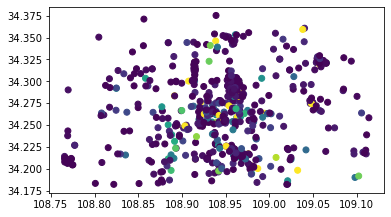

In [20]:
poi_df=pd.read_pickle(poi_fn_df) #读取已经保存的.pkl(pickle)数据格式的POI

import geopandas as gpd
from shapely.geometry import Point

poi_geoDF=poi_df.copy(deep=True)
poi_geoDF['geometry']=poi_geoDF.apply(lambda row:Point(row.location_lng,row.location_lat),axis=1) 
crs={'init': 'epsg:4326'} #配置坐标系统，参考：https://spatialreference.org/  
poi_gpd=gpd.GeoDataFrame(poi_geoDF,crs=crs)
poi_gpd.plot(column='detail_info_comment_num') #在这里设置了显示的参数为列`detail_info_comment_num`,即对<'query':'旅游景点'>配置中旅游景点的评论数量

#### 1.3.2 使用plotly库建立地图
geopandas库提供的地图显示方法功能有限，因为便捷，通常用于数据的查看，当需要地图具有一定质量，表达更多信息，甚至能够交互操作时，可以使用[plotly](https://plotly.com/)图表库实现。其地图底图使用了[mapbox](https://www.mapbox.com/)提供的地图数据，要使用其功能需要注册，并获取访问许可（access token），该部分操作相当便捷，可以自行查看。

使用plotly库建立地图，不需要将DataFrame转换为GeoDataFrame。

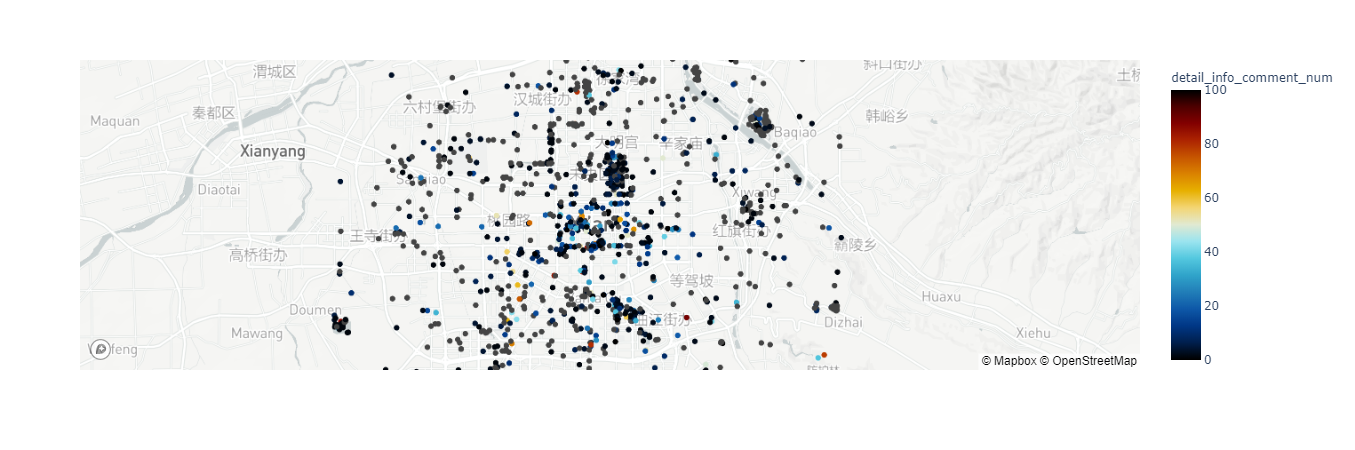

In [21]:
import plotly.express as px
poi_gpd.detail_info_price=poi_gpd.detail_info_price.fillna(0) #pandas库的方法同样适用于geopandas库，例如对`nan`位置填充指定数值
mapbox_token='pk.eyJ1IjoicmljaGllYmFvIiwiYSI6ImNrYjB3N2NyMzBlMG8yc254dTRzNnMyeHMifQ.QT7MdjQKs9Y6OtaJaJAn0A'
px.set_mapbox_access_token(mapbox_token)
fig=px.scatter_mapbox(poi_gpd,lat=poi_gpd.location_lat, lon=poi_gpd.location_lng,color="detail_info_comment_num",color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10) #亦可以选择列，通过size=""配置增加显示信息
fig.show()
fig.write_html(os.path.join(data_path,'POI_singlClassi.html'))

### 1.4 要点
#### 1.4.1 数据处理技术
* 用字典更新数据
经常需要配置参数，而参数如果是不固定的唯一值，则需要替换变量的值，为了能够把所需要的参数汇集起来，增加可读性又方便参数更新，字典的`d.update()`方法是一个不错的选择。

In [68]:
query_dic={
    'query':'旅游景点',
    'page_size':'20',
    'scope':2,
    'ak':'uqRcWhrQ6h0pAaSdxYn73GMWgd5uNrRX',
}
query_dic.update({'output':'json'}) #增加新的键值
print(query_dic)
print("_"*50)
for p in range(2):  
    #更新请求参数
    query_dic.update({'page_num':str(p),})#第一次增加新的键值，之后更新此键的值
    print(query_dic)

{'query': '旅游景点', 'page_size': '20', 'scope': 2, 'ak': 'uqRcWhrQ6h0pAaSdxYn73GMWgd5uNrRX', 'output': 'json'}
__________________________________________________
{'query': '旅游景点', 'page_size': '20', 'scope': 2, 'ak': 'uqRcWhrQ6h0pAaSdxYn73GMWgd5uNrRX', 'output': 'json', 'page_num': '0'}
{'query': '旅游景点', 'page_size': '20', 'scope': 2, 'ak': 'uqRcWhrQ6h0pAaSdxYn73GMWgd5uNrRX', 'output': 'json', 'page_num': '1'}


* 使用pathlib库的Path方法建立路径，并简洁的提取相关属性

对路径的操作主要使用三个库，一个是经典的os库；其二即是pathlib库；其三是glob库。

In [69]:
import os,pathlib
dir_path=os.getcwd()+"\BaiduMapPOI_collection_singleClassification.ipynb"
print(dir_path)
pb_path=pathlib.Path(dir_path)
print(
    "1_anchor "+pb_path.anchor+"\n",
    "2_drive "+pb_path.drive+"\n",
    "3_name "+pb_path.name+"\n",
    #"4_parent "+pb_path.parent+"\n",
    #"5_parents "+pb_path.parents+"\n",
    #"6_parts "+pb_path.parts+"\n",
    "7_root "+pb_path.root+"\n",
    "8_stem "+pb_path.stem+"\n",
    "9_suffix "+pb_path.suffix+"\n",
    #"10_suffixes "+pb_path.suffixes+"\n",
    )

C:\Users\richi\omen-richiebao\omen_github\Urban-Spatial-Data-Analysis_python\notebook\BaiduMapPOIcollection_ipynb\BaiduMapPOI_collection_singleClassification.ipynb
1_anchor C:\
 2_drive C:
 3_name BaiduMapPOI_collection_singleClassification.ipynb
 7_root \
 8_stem BaiduMapPOI_collection_singleClassification
 9_suffix .ipynb



* 文件保存的三种途径 csv、json和pickle

`csv_writer=csv.writer()->csv_writer.writerow([]) csv.reader()`，`json.dump() json.loads`，`pickle.dumps() pickle.loads()`

* 使用benedict库展平嵌套字典
本次实验读取POI的.csv格式数据之后，所获得的数据是嵌套的字典，而字典为字符串形式，因此首先使用eval()方法将字符串字典转换为字典，然后展平。

In [70]:
d_nested="{'name': '昆明池遗址', 'location': {'lat': 34.210991, 'lng': 108.779778}, 'address': '西安市长安区昆明池七夕公园内', 'province': '陕西省', 'city': '西安市', 'area': '长安区', 'detail': 1, 'uid': 'c7332cd7fbcc0d82ebe582d9', 'detail_info': {'tag': '旅游景点;景点', 'navi_location': {'lng': 108.7812626866, 'lat': 34.217484892966}, 'type': 'scope', 'detail_url': 'http://api.map.baidu.com/place/detail?uid=c7332cd7fbcc0d82ebe582d9&amp;output=html&amp;source=placeapi_v2', 'overall_rating': '4.3', 'comment_num': '77', 'children': []}}"
from benedict import benedict
d_benedict=benedict(eval(d_nested))
d_flatten=d_benedict.flatten(separator='_')
print(d_flatten)

{'name': '昆明池遗址', 'location_lat': 34.210991, 'location_lng': 108.779778, 'address': '西安市长安区昆明池七夕公园内', 'province': '陕西省', 'city': '西安市', 'area': '长安区', 'detail': 1, 'uid': 'c7332cd7fbcc0d82ebe582d9', 'detail_info_tag': '旅游景点;景点', 'detail_info_navi_location_lng': 108.7812626866, 'detail_info_navi_location_lat': 34.217484892966, 'detail_info_type': 'scope', 'detail_info_detail_url': 'http://api.map.baidu.com/place/detail?uid=c7332cd7fbcc0d82ebe582d9&amp;output=html&amp;source=placeapi_v2', 'detail_info_overall_rating': '4.3', 'detail_info_comment_num': '77', 'detail_info_children': []}


* 将嵌套字典转换为DataFrame数据格式

直接使用上述已经展平的字典。

In [71]:
import pandas as pd
d_df=pd.DataFrame(d_flatten.values(),index=d_flatten.keys(),columns=["val"])
print(d_df.head())

                         val
name                   昆明池遗址
location_lat          34.211
location_lng          108.78
address       西安市长安区昆明池七夕公园内
province                 陕西省


* 用python的地理信息库例如geopandas、gdal、ogr、rasterstats、pysal等辅助分析地理信息数据。用shapely处理几何数据。

#### 1.4.2 新建立的函数工具
* function-百度地图开放平台POI数据爬取，`baiduPOI_dataCrawler(query_dic,bound_coordinate,partition,page_num_range,poi_fn_list=False)`;
* function-转换.csv格式的POI数据为pandas的DataFrame,`csv2df(poi_fn_csv)`。

#### 1.4.3 所调用的python库

In [72]:
import urllib, json, csv,os,pathlib
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from benedict import benedict

import plotly.express as px
from plotly.offline import plot